## Breast Cancer Study - Modeling

In [1]:
#load necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data into pandas df and print the first five rows
nki_bc_for_model = pd.read_csv('nki_bc_for_model.csv')
nki_bc_for_model.head()

age  survival  timerecurrence  histtype      diam  posnodes  \
0 -0.192098  1.728368        1.814682 -0.202499  0.284390 -0.637497   
1  0.724579  1.585775        1.681393 -0.202499 -0.291161 -0.637497   
2 -1.108775 -0.368384       -0.145252 -0.202499 -0.866712 -0.637497   
3  1.091250 -0.085305        0.119355 -0.202499 -0.866712 -0.162431   
4 -1.108775 -0.421768       -0.223387 -0.202499 -0.866712 -0.637497   

   eventdeath  chemo  hormonal  amputation  ...  Contig36312_RC  \
0           0      0         0           1  ...        0.591103   
1           0      0         0           0  ...       -0.199829   
2           0      0         0           0  ...        0.328736   
3           0      0         1           0  ...        0.648861   
4           0      0         0           1  ...       -0.287538   

   Contig38980_RC  NM_000853  NM_000854  NM_000860  Contig29014_RC  \
0       -0.355018   0.373644  -0.760690  -0.164025       -0.038726   
1       -0.001635  -0.062922  -0.682204  -0.220934       -0.100088   
2       -0.047571   0.084228  -0.695950  -0.402840       -0.099965   
3       -0.039088   0.182182  -0.524640   0.037320       -0.167688   
4       -0.286893   0.057082  -0.565021  -0.105632       -0.108148   

   Contig46616_RC  NM_000888  NM_000898  AF067420  
0        0.237856  -0.087631  -0.369153  0.153795  
1       -0.466537  -0.231547  -0.643019 -0.014098  
2        0.110155  -0.114298   0.258495 -0.198911  
3       -0.016790  -0.285344  -0.251188  0.862710  
4       -0.405853  -0.053601  -0.677072  0.134160  

[5 rows x 1573 columns]

In [3]:
# Below is from previous steps in Capstone project

# Declare an explanatory variable, called X, and assign it the result of dropping 'eventdeath' from the df
X = nki_bc_for_model.drop(['eventdeath'], axis=1)

# Declare a response variable, called y, and assign it the eventdeath column of the df 
y = nki_bc_for_model['eventdeath']

# Change y from Series to array
y = y.ravel()

# Import the train_test_split function from the sklearn.model_selection  
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Using 75/25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Model 1 - Logistic Regression Model

In [4]:
# Using Logistic Regression algorithm on training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Test for accuracy on test set
lr_test_accuracy = accuracy_score(lr.predict(X_test), y_test)
print(lr_test_accuracy)

0.8676470588235294


### Tuning the model

In [5]:
from sklearn.model_selection import KFold

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    fold = KFold(n_splits=5,random_state=None)
    for train_index, test_index in fold.split(x): 
        x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(x_train, y_train) # fit
        result += score_func(clf.predict(x_test), y_test) # evaluate score function on held-out data
    return result / nfold # average


In [6]:
clf = LogisticRegression()
score = cv_score(clf, X_train, y_train)
print(score)

0.7943902439024391


In [7]:
logreg_grid = LogisticRegression()
logreg_grid.fit(X_train, y_train)
y_pred_grid = logreg_grid.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, y_pred_grid)
print('The Logistic Regression Test Accuracy is ', lr_test_accuracy)

The Logistic Regression Test Accuracy is  0.8676470588235294


In [8]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

explained_variance_score(y_test, y_pred_grid)

0.38095238095238126

In [9]:
mean_absolute_error(y_test, y_pred_grid)

0.1323529411764706

In [10]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100, 1000, 10000]

# Find average score for each C
mydict = {}
avg_scores = []
for C in Cs:
    
    logreg = LogisticRegression(C=C)
    avg_score = cv_score(logreg, X_train, y_train)
    print('The avg_score for C = ', C, 'is ', avg_score)
    
    if C not in mydict:
        mydict[C] = []
        mydict[C].append(avg_score)
        avg_scores.append(avg_score)

print(mydict)
    
# Find highest average score
max_value = max(avg_scores)

# Find the C(s) with the highest average score
mylist = []
for k, v in mydict.items():
    if v == max_value:
        mylist.append(k)

print('The C with the highest avg_score of', max_value, 'is ', mylist)

The avg_score for C =  0.001 is  0.7258536585365855
The avg_score for C =  0.1 is  0.7943902439024391
The avg_score for C =  1 is  0.7943902439024391
The avg_score for C =  10 is  0.7942682926829269
The avg_score for C =  100 is  0.8040243902439025
The avg_score for C =  1000 is  0.8186585365853659
The avg_score for C =  10000 is  0.8090243902439024
{0.001: [0.7258536585365855], 0.1: [0.7943902439024391], 1: [0.7943902439024391], 10: [0.7942682926829269], 100: [0.8040243902439025], 1000: [0.8186585365853659], 10000: [0.8090243902439024]}
The C with the highest avg_score of 0.8186585365853659 is  [1000]


In [11]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
param_grid = {'C': Cs}

# Instantiate logistic regression classifier
logreg_grid = LogisticRegression()

# Instantiate the GridSearchCV object
logreg_grid_cv = GridSearchCV(logreg_grid, param_grid, cv=5)

# Fit to the training data
logreg_grid_cv.fit(X_train, y_train)

lr_train_best_score = logreg_grid_cv.best_score_

print('Tuned Logistic Regression Parameters: {}'.format(logreg_grid_cv.best_params_))
print('The best score is ', lr_train_best_score)

Tuned Logistic Regression Parameters: {'C': 1000}
The best score is  0.7990243902439025


In [12]:
# How does the model perform on test set?

logreg_grid2 = LogisticRegression(C=logreg_grid_cv.best_params_['C'])
logreg_grid2.fit(X_train, y_train)
y_pred_grid2 = logreg_grid2.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, y_pred_grid2)
print('The Logistic Regression Test Accuracy is ', lr_test_accuracy)

The Logistic Regression Test Accuracy is  0.8823529411764706


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_grid2)

array([[44,  3],
       [ 5, 16]])

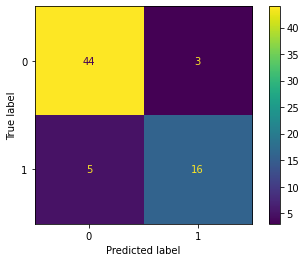

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_grid2, X_test, y_test)
plt.grid(False)

#### Out of the 19 (16 + 3) predicted to be positive, 16 were correctly identified

#### Out of the 21 (5 + 16) positive cases, 16 were correctly identified

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_grid2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.84      0.76      0.80        21

    accuracy                           0.88        68
   macro avg       0.87      0.85      0.86        68
weighted avg       0.88      0.88      0.88        68



In [16]:
explained_variance_score(y_test, y_pred_grid2)

0.452887537993921

In [17]:
mean_absolute_error(y_test, y_pred_grid2)

0.11764705882352941

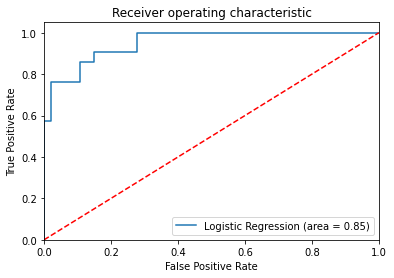

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc = roc_auc_score(y_test, logreg_grid2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_grid2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
feature_list = nki_bc_for_model.columns
importance = logreg_grid2.coef_[0]
lr_importance_dict = dict(zip(feature_list, importance)) 

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(5, lr_importance_dict.items())
n_items

[('age', -0.3545064085345883),
 ('survival', -1.640223837621396),
 ('timerecurrence', -3.3192539643148593),
 ('histtype', -0.23719413210839446),
 ('diam', 0.8058551475178143)]

#### This is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [20]:
# sort coef in descending order
lr_importance_dict_sorted = {k: v for k, v in sorted(lr_importance_dict.items(), key=lambda item: item[1], reverse=True)}

top_ten_positive = {k: v for k, v in sorted(lr_importance_dict.items(), key=lambda item: item[1], reverse=True)[:10]}

top_ten_positive_df = pd.DataFrame.from_dict(top_ten_positive, orient = 'index')
print(top_ten_positive_df)

                       0
Contig38654_RC  1.152736
Contig32594_RC  1.035528
NM_000853       1.015765
NM_005130       0.980268
diam            0.805855
Contig29022_RC  0.759121
NM_001885       0.749239
NM_003247       0.665546
Contig14458_RC  0.663208
AL049279        0.662963


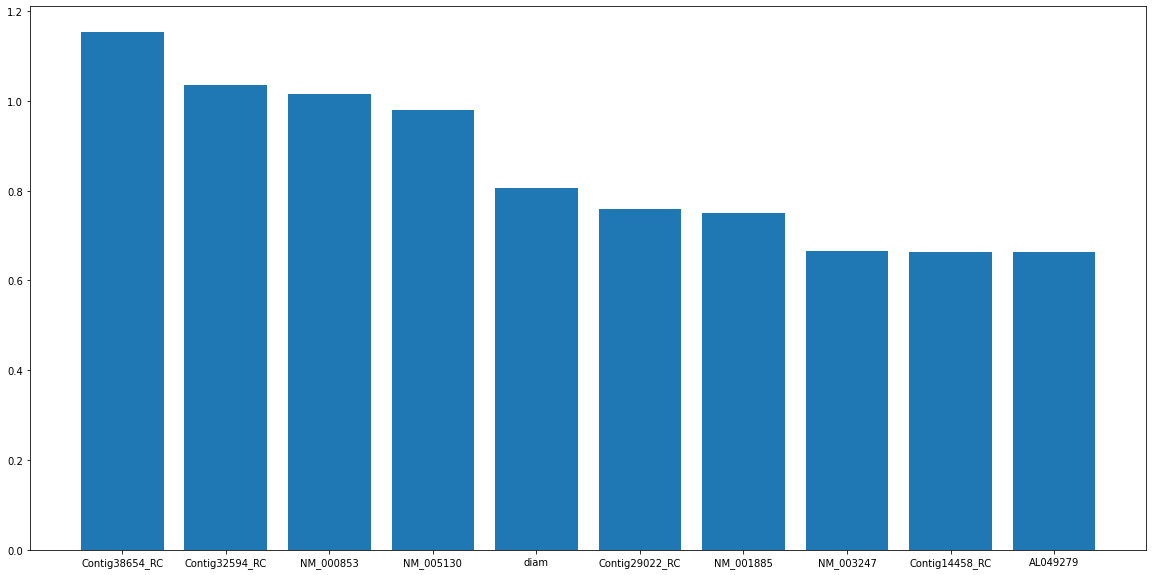

In [21]:
plt.figure(figsize=(20,10))
plt.bar(range(len(top_ten_positive)), list(top_ten_positive.values()), align='center')
plt.xticks(range(len(top_ten_positive)), list(top_ten_positive.keys()))
plt.show()

In [22]:
# sort coef in ascending order
lr_importance_dict_sorted = {k: v for k, v in sorted(lr_importance_dict.items(), key=lambda item: item[1], reverse=True)}

top_ten_negative = {k: v for k, v in sorted(lr_importance_dict.items(), key=lambda item: item[1])[:10]}

top_ten_negative_df = pd.DataFrame.from_dict(top_ten_negative, orient = 'index')
print(top_ten_negative_df)

                       0
timerecurrence -3.319254
survival       -1.640224
NM_003311      -0.997566
U80736         -0.972480
Contig38918_RC -0.871696
NM_004406      -0.867507
Contig45389_RC -0.847808
Contig52994_RC -0.838095
Contig38438_RC -0.809392
NM_000096      -0.787933


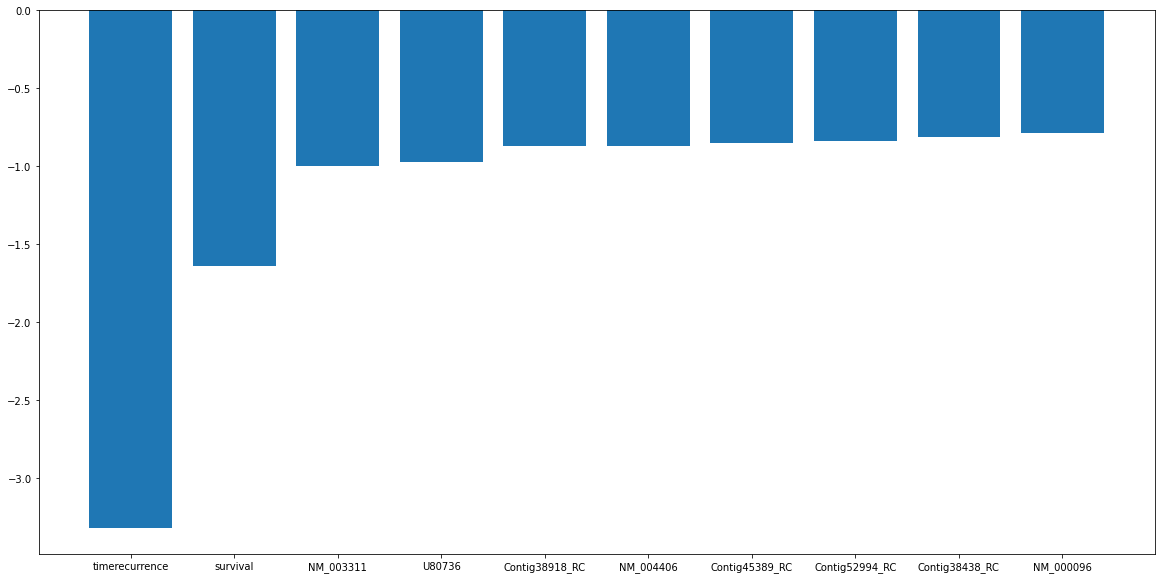

In [23]:
plt.figure(figsize=(20,10))
plt.bar(range(len(top_ten_negative)), list(top_ten_negative.values()), align='center')
plt.xticks(range(len(top_ten_negative)), list(top_ten_negative.keys()))
plt.show()

## Model 2 - Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Declare a variable called rf_model 
rf_model = RandomForestClassifier(random_state = 42)

# Model and fit
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf = pd.Series(y_pred_rf)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("Balanced accuracy:", balanced_accuracy_score(y_test,y_pred_rf))
print('Precision score' , precision_score(y_test,y_pred_rf))
print('Recall score' , recall_score(y_test,y_pred_rf))

Accuracy: 0.8235294117647058
Balanced accuracy: 0.7406281661600811
Precision score 0.8461538461538461
Recall score 0.5238095238095238


In [26]:
confusion_matrix(y_test, y_pred_rf)

array([[45,  2],
       [10, 11]])

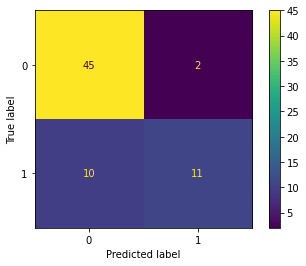

In [27]:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.grid(False)

#### Out of the 13 (11 + 2) predicted to be positive, 11 were correctly identified

#### Out of the 21 (10 + 11) positive cases, 11 were correctly identified

In [28]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        47
           1       0.85      0.52      0.65        21

    accuracy                           0.82        68
   macro avg       0.83      0.74      0.76        68
weighted avg       0.83      0.82      0.81        68



In [29]:
explained_variance_score(y_test, y_pred_rf)

0.23809523809523814

In [30]:
mean_absolute_error(y_test, y_pred_rf)

0.17647058823529413

In [31]:
# Find the importance of the features

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
rf_top_ten = importances[:10]
rf_top_ten

importance
feature                   
timerecurrence       0.041
survival             0.027
Contig40552_RC       0.009
NM_001809            0.007
Contig23211_RC       0.007
AL109706             0.007
NM_018410            0.007
NM_006096            0.007
NM_019000            0.006
Contig34989_RC       0.006

<AxesSubplot:xlabel='feature'>

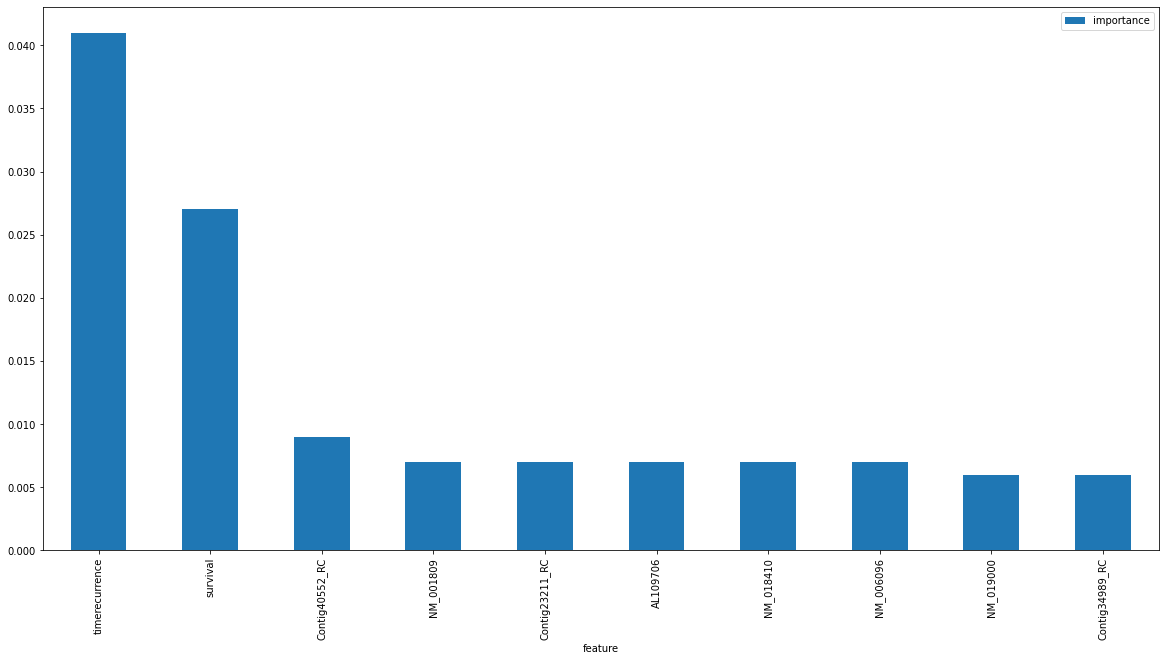

In [32]:
rf_top_ten.plot.bar(figsize=(20,10))

### Tuning the model

In [33]:
param_grid = {'n_estimators':np.arange(1,100)}
forest = RandomForestClassifier(random_state = 42)
forest_cv= GridSearchCV(forest,param_grid,cv=5)
forest_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,

In [34]:
print("Best Score:" + str(forest_cv.best_score_))
print("Best Parameters: " + str(forest_cv.best_params_))

Best Score:0.7942087542087543
Best Parameters: {'n_estimators': 67}


In [35]:
# Declare a variable called rf_model2 
rf_model2 = RandomForestClassifier(n_estimators = 67, random_state = 42)

# Model and fit
rf_model2.fit(X_train, y_train)
y_pred_rf2 = rf_model2.predict(X_test)
y_pred_rf2 = pd.Series(y_pred_rf2)
rf_model2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=67,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
confusion_matrix(y_test, y_pred_rf2)

array([[44,  3],
       [ 7, 14]])

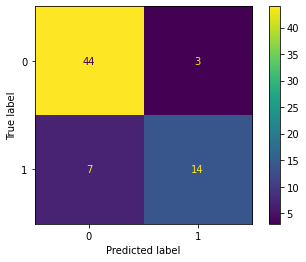

In [37]:
plot_confusion_matrix(rf_model2, X_test, y_test)
plt.grid(False)

#### Out of the 17 (14 + 3) predicted to be positive, 14 were correctly identified

#### Out of the 21 (7 + 14) positive cases, 14 were correctly identified

In [38]:
print("Accuracy:", accuracy_score(y_test,y_pred_rf2))
print("Balanced accuracy:", balanced_accuracy_score(y_test,y_pred_rf2))
print('Precision score' , precision_score(y_test,y_pred_rf2))
print('Recall score' , recall_score(y_test,y_pred_rf2))

Accuracy: 0.8529411764705882
Balanced accuracy: 0.801418439716312
Precision score 0.8235294117647058
Recall score 0.6666666666666666


In [39]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.82      0.67      0.74        21

    accuracy                           0.85        68
   macro avg       0.84      0.80      0.82        68
weighted avg       0.85      0.85      0.85        68



In [40]:
explained_variance_score(y_test, y_pred_rf2)

0.3272543059777101

In [41]:
mean_absolute_error(y_test, y_pred_rf2)

0.14705882352941177

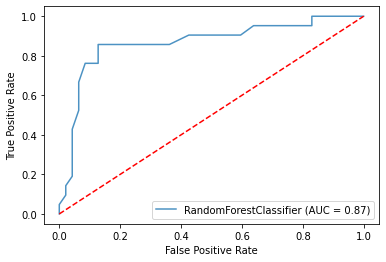

In [42]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
plot_roc_curve(rf_model2, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [43]:
# Find the importance of the features

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_model2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
rf2_top_ten = importances[:10]
rf2_top_ten

importance
feature                   
timerecurrence       0.050
survival             0.026
Contig40552_RC       0.013
NM_018410            0.011
Contig34989_RC       0.009
NM_019000            0.009
Contig23211_RC       0.009
NM_006096            0.007
NM_000129            0.006
NM_001809            0.006

<AxesSubplot:xlabel='feature'>

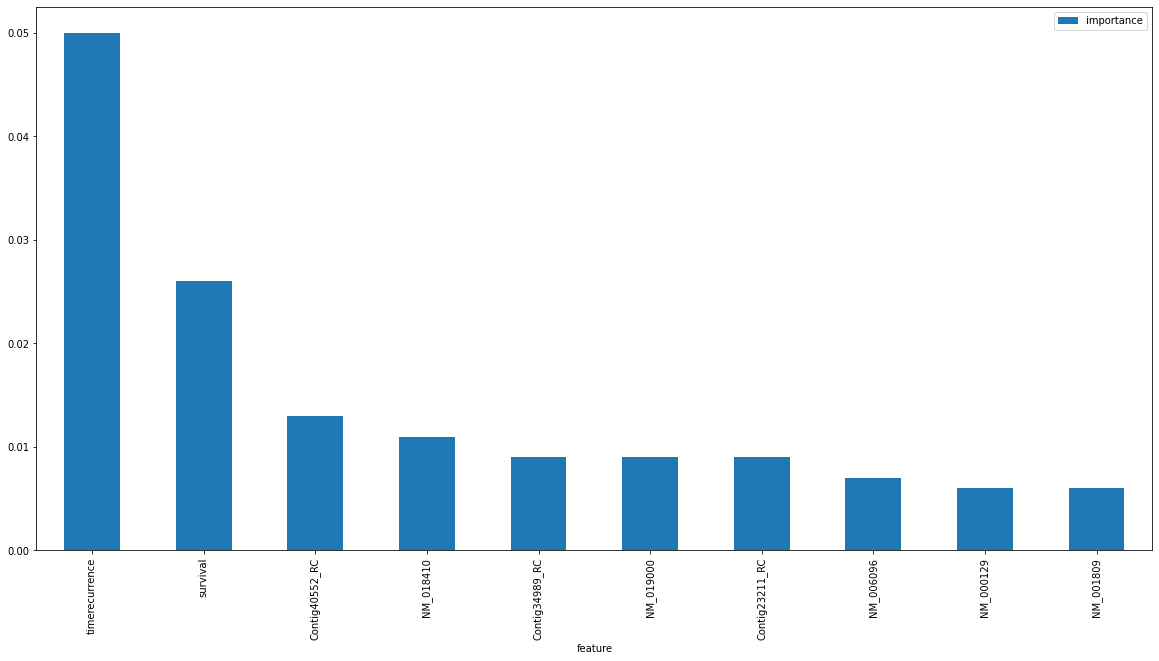

In [44]:
rf2_top_ten.plot.bar(figsize=(20,10))

## Model 3 - Survival Analysis Model

In [45]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(nki_bc_for_model['survival'], nki_bc_for_model['eventdeath'])
table

removed  observed  censored  entrance  at_risk
event_at                                                 
-1.890548        1         1         0       272      272
-1.823115        1         1         0         0      271
-1.797827        1         1         0         0      270
-1.735311        1         1         0         0      269
-1.726180        1         1         0         0      268
...            ...       ...       ...       ...      ...
 2.413236        1         0         1         0        5
 2.435714        1         0         1         0        4
 2.457489        1         0         1         0        3
 2.565664        1         0         1         0        2
 2.632394        1         0         1         0        1

[261 rows x 5 columns]

In [46]:
# Calculate survival rate at each survival time

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(nki_bc_for_model['survival'], nki_bc_for_model['eventdeath'])
kmf.survival_function_

KM_estimate
timeline              
-1.890548     0.996324
-1.823115     0.992647
-1.797827     0.988971
-1.735311     0.985294
-1.726180     0.981618
...                ...
 2.413236     0.604113
 2.435714     0.604113
 2.457489     0.604113
 2.565664     0.604113
 2.632394     0.604113

[261 rows x 1 columns]

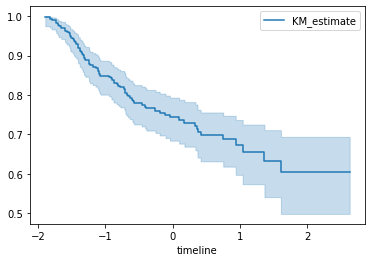

In [47]:
# How does survival decrease over time?
kmf.plot_survival_function();

In [48]:
# Calculate hazard rate with Nelson Aalen Estimate

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(nki_bc_for_model['survival'], event_observed=nki_bc_for_model['eventdeath'])
naf.cumulative_hazard_

NA_estimate
timeline              
-1.890548     0.003676
-1.823115     0.007367
-1.797827     0.011070
-1.735311     0.014788
-1.726180     0.018519
...                ...
 2.413236     0.500599
 2.435714     0.500599
 2.457489     0.500599
 2.565664     0.500599
 2.632394     0.500599

[261 rows x 1 columns]

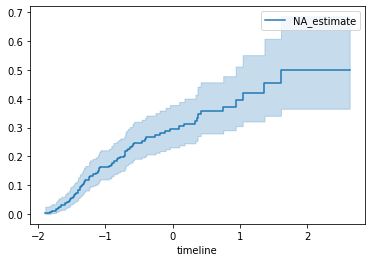

In [49]:
naf.plot_cumulative_hazard();

#### Concordance index will evaluate the predictions made by an algorithm. It is the proportion of concordant pairs divided by the total number of possible evaluation pairs.

In [51]:
import numpy as np
from lifelines import AalenAdditiveFitter, CoxPHFitter
from lifelines.utils import k_fold_cross_validation

#create the three models to compare.
aaf_1 = AalenAdditiveFitter(coef_penalizer=0.5)
aaf_2 = AalenAdditiveFitter(coef_penalizer=10)
cph = CoxPHFitter(penalizer=0.1)

print('The cph concordance index is: ', np.mean(k_fold_cross_validation(cph, nki_bc_for_model, duration_col='survival', event_col= 'eventdeath', scoring_method="concordance_index")))
print('The aaf_1 concordance index is: ', np.mean(k_fold_cross_validation(aaf_1, nki_bc_for_model, duration_col='survival', event_col= 'eventdeath', scoring_method="concordance_index")))
print('The aaf_2 concordance index is: ', np.mean(k_fold_cross_validation(aaf_2, nki_bc_for_model, duration_col='survival', event_col= 'eventdeath', scoring_method="concordance_index")))

The cph concordance index is:  0.7808860685482126
The aaf_1 concordance index is:  0.5
The aaf_2 concordance index is:  0.5


#### Concordance index values close to 0.5 indicate that the risk score predictions are not better than random. Whereas, ci values close to 1 indicate that the risk scores are good at determining which patients will be affected. In this case, the Cox proportional hazard model would be a better performing model than the Nelson Aalen model.

In [52]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)
cph.fit(nki_bc_for_model, duration_col='survival', event_col='eventdeath')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'survival'
                event col = 'eventdeath'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -198.22
         time fit was run = 2021-01-04 23:56:06 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
age             -0.14       0.87       0.17            -0.48             0.19                 0.62                 1.21
timerecurrence  -0.70       0.50       0.18            -1.05            -0.35                 0.35                 0.70
histtype         0.04       1.04       0.17            -0.29             0.37                 0.75                 1.45
diam             0.08       1.09       0.17            -0.26             0.43                 0.77                 1.53
posnodes         0.04       1.04       0.17            -0.30             0.37                 0.74                 1.44
chemo           -0.18       0.83       0.36            -0.88             0.52                 0.41                 1.68
hormonal         0.06       1.06       0.52            -0.96             1.08                 0.38                 2.94
amputation       0.15       1.16       0.35            -0.53             0.83                 0.59                 2.30
grade_1         -0.24       0.78       0.41            -1.05             0.56                 0.35                 1.76
grade_2         -0.05       0.95       0.37            -0.77             0.67                 0.46                 1.95
grade_3          0.25       1.28       0.37            -0.47             0.96                 0.63                 2.62
angioinv_1      -0.13       0.88       0.36            -0.84             0.58                 0.43                 1.78
angioinv_2      -0.17       0.85       0.56            -1.27             0.94                 0.28                 2.56
angioinv_3       0.24       1.27       0.39            -0.52             1.00                 0.59                 2.72
lymphinfil_1     0.09       1.10       0.46            -0.81             0.99                 0.44                 2.70
lymphinfil_2    -0.03       0.97       0.58            -1.15             1.10                 0.32                 3.01
lymphinfil_3    -0.15       0.86       0.65            -1.42             1.12                 0.24                 3.06
esr1            -0.04       0.96       0.34            -0.70             0.62                 0.50                 1.85
G3PDH_570        0.07       1.07       0.28            -0.48             0.62                 0.62                 1.86
Contig45645_RC  -0.06       0.94       0.48            -1.01             0.89                 0.36                 2.43
Contig44916_RC   0.04       1.04       0.61            -1.16             1.23                 0.31                 3.43
D25272          -0.19       0.83       0.52            -1.21             0.83                 0.30                 2.30
J00129           0.02       1.02       0.46            -0.89             0.92                 0.41                 2.51
Contig29982_RC  -0.09       0.92       0.58            -1.23             1.05                 0.29                 2.87
Contig56678_RC  -0.04       0.96       0.49            -1.00             0.93                 0.37                 2.53
Contig53047_RC  -0.03       0.97       0.43            -0.86             0.80                 0.42                 2.23
Contig19551     -0.13       0.88       0.48            -1.07             0.81                 0.34                 2.24
Contig47230_RC   0.02       1.02       0.58            -1.12             1.15              

#### Hazard ratios

HR > 1 : increase in hazard\
HR < 1 : decrease in hazard\
HR = 1 : No Effect

In [53]:
# Get hazard ratios (exp(coef)) for the features and convert to df
haz_ratio = cph.hazard_ratios_
haz_ratio = haz_ratio.to_frame()

# Sort values in ascending order
haz_ratio_asc = haz_ratio.sort_values(by=['exp(coef)'])
haz_ratio_desc = haz_ratio.sort_values(by=['exp(coef)'], ascending=False)

print(haz_ratio_asc.head(10))
print(haz_ratio_desc.head(10))

                exp(coef)
covariate                
timerecurrence   0.496987
AL049963         0.611271
NM_002122        0.637833
NM_006727        0.645955
Contig40158_RC   0.646424
NM_002274        0.649298
Contig23108_RC   0.688305
Contig41530_RC   0.703440
Contig11648_RC   0.707386
NM_003430        0.708540
                exp(coef)
covariate                
AL137274         1.653644
NM_014903        1.582188
NM_004994        1.552761
Contig51202_RC   1.542266
NM_001109        1.539917
Contig14954_RC   1.533190
NM_001336        1.529811
Contig8165_RC    1.528917
NM_000903        1.499798
NM_016359        1.492394


#### Holding the other covariates constant: 
A higher time to recurrence reduces the hazard by a factor of 0.55, or 45%\
Higher levels of AL049963 reduces the hazard by a factor of 0.62 or 38%\
Higher levels of X01394 reduces the hazard by a factor of 0.63 or 37%\
etc.


A higher level of Contig57270_RC has a 103% higher risk of death\
A higher level of Contig51202_RC has a 86% higher risk of death\
A higher level of NM_006461 has a 62% higher risk of death\
etc.

#### Examining the p values:

To get an idea of whether or not there is a significant effect by the various features, we will look at the p values from the CPH model summary.

In [54]:
cph_summary = cph.summary

# Sort values in ascending order
cph_summary_asc = cph_summary.sort_values(by=['p'])

print(cph_summary_asc.head(10))

                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
timerecurrence -0.699192   0.496987  0.177161       -1.046420       -0.351963   
age            -0.143506   0.866315  0.170396       -0.477477        0.190464   
NM_002274      -0.431863   0.649298  0.556857       -1.523282        0.659557   
NM_004994       0.440035   1.552761  0.571142       -0.679384        1.559453   
NC_001807       0.400335   1.492324  0.523982       -0.626651        1.427321   
NM_002121       0.260752   1.297906  0.352969       -0.431054        0.952558   
Contig8165_RC   0.424560   1.528917  0.580053       -0.712324        1.561443   
NM_000854       0.301133   1.351389  0.412048       -0.506466        1.108731   
NM_004864       0.297084   1.345928  0.412665       -0.511725        1.105892   
NM_014903       0.458809   1.582188  0.643464       -0.802358        1.719976   

                exp(coef) l

#### Time to recurrence seems to be significant with a p-value of 0.003.

### Tuning the model

In [55]:
cph2 = CoxPHFitter(penalizer=0.1)
#fit CoxPH model
cph2_train, cph2_test = train_test_split(nki_bc_for_model, test_size=0.25) 
cph2.fit(cph2_train, 'survival', 'eventdeath')

/Users/shannonballard/opt/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:980: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
/Users/shannonballard/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/coxph_fitter.py:1583: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  "Newton-Rhaphson failed to converge sufficiently. {0}".format(CONVERGENCE_DOCS), exceptions.ConvergenceWarning


<lifelines.CoxPHFitter: fitted with 204 total observations, 147 right-censored observations>

In [56]:
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 204 total observations, 147 right-censored observations>
             duration col = 'survival'
                event col = 'eventdeath'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 204
number of events observed = 57
   partial log-likelihood = -481.37
         time fit was run = 2021-01-04 23:58:42 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
age             -0.14       0.87       0.21            -0.54             0.27                 0.58                 1.31
timerecurrence  -0.48       0.62       0.22            -0.91            -0.04                 0.40                 0.96
histtype         0.05       1.05       0.20            -0.35             0.44                 0.71                 1.56
diam             0.01       1.01       0.21            -0.40             0.42                 0.67                 1.52
posnodes         0.10       1.11       0.19            -0.28             0.49                 0.76                 1.62
chemo           -0.10       0.90       0.43            -0.95             0.75                 0.39                 2.11
hormonal         0.17       1.19       0.63            -1.06             1.40                 0.35                 4.05
amputation       0.01       1.01       0.43            -0.83             0.84                 0.44                 2.32
grade_1         -0.14       0.87       0.49            -1.10             0.81                 0.33                 2.25
grade_2         -0.00       1.00       0.45            -0.88             0.88                 0.41                 2.41
grade_3          0.12       1.13       0.44            -0.74             0.98                 0.48                 2.66
angioinv_1      -0.02       0.98       0.44            -0.88             0.84                 0.42                 2.31
angioinv_2       0.14       1.16       0.66            -1.15             1.44                 0.32                 4.21
angioinv_3      -0.05       0.95       0.48            -0.99             0.89                 0.37                 2.43
lymphinfil_1     0.14       1.15       0.54            -0.91             1.20                 0.40                 3.31
lymphinfil_2     0.27       1.31       0.68            -1.06             1.59                 0.35                 4.92
lymphinfil_3    -0.61       0.54       0.77            -2.12             0.89                 0.12                 2.43
esr1            -0.03       0.97       0.38            -0.78             0.72                 0.46                 2.05
G3PDH_570        0.19       1.21       0.36            -0.51             0.89                 0.60                 2.43
Contig45645_RC  -0.12       0.89       0.62            -1.33             1.09                 0.26                 2.99
Contig44916_RC  -0.20       0.82       0.79            -1.74             1.35                 0.18                 3.84
D25272          -0.15       0.86       0.64            -1.40             1.11                 0.25                 3.04
J00129           0.06       1.06       0.59            -1.09             1.22                 0.33                 3.38
Contig29982_RC   0.08       1.09       0.70            -1.29             1.45                 0.28                 4.28
Contig56678_RC  -0.08       0.92       0.57            -1.20             1.04                 0.30                 2.82
Contig53047_RC   0.01       1.01       0.50            -0.97             1.00                 0.38                 2.72
Contig19551     -0.19       0.83       0.58            -1.31             0.94                 0.27                 2.57
Contig47230_RC   0.03       1.03       0.73            -1.41             1.46              

In [57]:
# Get hazard ratios for the features and convert to df
haz_ratio2 = cph2.hazard_ratios_
haz_ratio2 = haz_ratio2.to_frame()

# Sort values in ascending order
haz_ratio2_asc = haz_ratio2.sort_values(by=['exp(coef)'])
haz_ratio2_desc = haz_ratio2.sort_values(by=['exp(coef)'], ascending=False)

haz_ratio2_low_ten = haz_ratio2_asc.head(10)
haz_ratio2_high_ten = haz_ratio2_desc.head(10)

print(haz_ratio2_low_ten)
print(haz_ratio2_high_ten)

                exp(coef)
covariate                
AL049963         0.488892
Contig4380_RC    0.513810
D25217           0.528801
lymphinfil_3     0.540660
Contig31862_RC   0.545414
NM_006727        0.576049
timerecurrence   0.621628
NM_006338        0.621741
Contig23108_RC   0.633319
Contig3682_RC    0.634807
                exp(coef)
covariate                
NM_006240        2.321060
NM_003234        2.232502
NM_004354        1.868859
NM_006206        1.862040
NM_014214        1.847118
Contig24682_RC   1.810276
X04706           1.727909
Contig10961_RC   1.726360
AF144054         1.680014
NM_003740        1.649468


#### Holding the other covariates constant: 

Higher levels of AL049963 reduces the hazard by a factor of 0.55, or 45%\
A higher time to recurrence reduces the hazard by a factor of 0.56 or 44%\
Higher levels of Contig37743_RC reduces the hazard by a factor of 0.58 or 42%\
etc.


A higher level of Contig39678_RC has a 91% higher risk of death\
A higher level of NM_001336 has a 67% higher risk of death\
A higher level of Contig27294 has a 66% higher risk of death\
etc.

#### Looking at p values in tuned model

In [58]:
cph2_summary = cph2.summary

# Sort values in ascending order
cph2_summary_asc = cph2_summary.sort_values(by=['p'])

print(cph2_summary_asc.head(10))

                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
timerecurrence -0.475414   0.621628  0.222901       -0.912292       -0.038536   
Contig4380_RC  -0.665901   0.513810  0.670137       -1.979346        0.647543   
NM_003234       0.803123   2.232502  0.896802       -0.954577        2.560823   
Contig51981_RC -0.438031   0.645306  0.508982       -1.435616        0.559555   
D25217         -0.637143   0.528801  0.787454       -2.180525        0.906240   
lymphinfil_3   -0.614964   0.540660  0.766605       -2.117483        0.887555   
NM_014214       0.613626   1.847118  0.778602       -0.912405        2.139658   
AL049963       -0.715614   0.488892  0.924822       -2.528233        1.097004   
NM_001853       0.400627   1.492761  0.533868       -0.645736        1.446990   
NM_006206       0.621673   1.862040  0.841140       -1.026931        2.270276   

                exp(coef) l

#### Again, time to recurrence seems to be significant with a p-value of 0.006

#### Calibration is the propensity of a model to get probabilities correct over time. To get an idea of the accuracy, we can examine the calibration over prediction time by finding the Brier score loss, which ranges from 0 to 1. The smaller the Brier score loss (the closer to 0), the lower the difference between the predicted probability and the actual outcome.

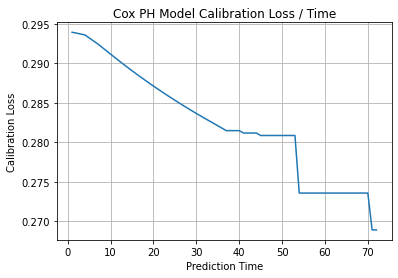

In [59]:
from sklearn.metrics import brier_score_loss
loss_dict = {} 

for i in range(1,73): 
    w = cph2.predict_survival_function(cph2_test)
    prob = np.array(w.iloc[i])
    score = brier_score_loss(cph2_test['eventdeath'], (1 - prob), pos_label=1) 
    loss_dict[i] = [score] 
loss_df = pd.DataFrame(loss_dict).T 
fig, ax = plt.subplots() 
ax.plot(loss_df.index, loss_df.values) 
ax.set(xlabel='Prediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time') 
ax.grid() 
plt.show()

#### The model is best calibrated between approximately 22 and 32.

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 204 total observations, 147 right-censored observations>
         test_name = proportional_hazard_test

---
                     test_statistic    p  -log2(p)
AA600139_RC    km              2.55 0.11      3.18
               rank            3.25 0.07      3.81
AB002351       km              0.01 0.94      0.09
               rank            0.02 0.89      0.16
AB006625       km              1.07 0.30      1.74
               rank            0.93 0.33      1.58
AB007936       km              0.23 0.63      0.67
               rank            0.49 0.48      1.05
AB007954       km              0.04 0.83      0.26
               rank            0.11 0.75      0.42
AB011146       km              1.78 0.18      2.46
               rank            2.07 0.15      2.73
AB014533       km              0.15 0.70      0.52
               rank            0.07 0.79      0.34
AB014534       km              0.03 0.85      0.23
               rank            0.03 0.87      0.20
AB018289       km              0.37 0.54      0.88
               rank            0.40 0.53      0.93
AB018305       km              0.01 0.92      0.12
               rank            0.00 0.95      0.07
AB018311       km              0.41 0.52      0.94
               rank            0.40 0.53      0.93
AB018345       km              0.12 0.73      0.45
               rank            0.14 0.71      0.49
AB020689       km              0.02 0.88      0.19
               rank            0.01 0.92      0.12
AB023144       km              0.00 0.97      0.04
               rank            0.05 0.83      0.27
AB023211       km              0.09 0.77      0.38
               rank            0.03 0.85      0.23
AB028974       km              0.12 0.73      0.45
               rank            0.15 0.70      0.51
AB029018       km              0.00 0.95      0.08
               rank            0.00 0.98      0.03
AB032953       km              0.81 0.37      1.45
               rank            1.46 0.23      2.14
AB032962       km              0.50 0.48      1.06
               rank            0.71 0.40      1.33
AB033027       km              0.29 0.59      0.76
               rank            0.47 0.49      1.02
AB033060       km              0.80 0.37      1.43
               rank            0.77 0.38      1.39
AB033083       km              0.93 0.33      1.58
               rank            1.27 0.26      1.95
AB037734       km              0.04 0.84      0.25
               rank            0.09 0.76      0.39
AB037745       km              0.13 0.72      0.47
               rank            0.15 0.70      0.52
AB037763       km              0.36 0.55      0.86
               rank            0.34 0.56      0.83
AB037791       km              0.00 0.95      0.07
               rank            0.03 0.85      0.23
AB037821       km              0.81 0.37      1.44
               rank            1.02 0.31      1.68
AB037836       km              0.00 0.95      0.08
               rank            0.05 0.82      0.29
AB037848       km              0.12 0.73      0.45
               rank            0.12 0.73      0.46
AB040886       km              0.26 0.61      0.71
               rank            0.20 0.66      0.61
AB040900       km              0.40 0.52      0.93
               rank            0.45 0.50      0.99
AB040923       km              0.62 0.43      1.22
               rank            0.53 0.47      1.10
AB040926       km              0.24 0.62      0.68
               rank            0.30 0.58      0.78
AB040930       km              0.42 0.52      0.95
               rank            0.58 0.44      1.17
AB040957       km              1.31 0.25      1.98
               rank            1.87 0.17      2.55
AB041269       km              0.34 0.56      0.84
               rank            0.20 0.66      0.61




1. Variable 'angioinv_3' failed the non-proportional test: p-value is 0.0278.

   Advice: with so few unique values (only 2), you can include `strata=['angioinv_3', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Contig26182_RC' failed the non-proportional test: p-value is 0.0518.

   Advice 1: the functional form of the variable 'Contig26182_RC' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Contig26182_RC' using pd.cut, and then specify it in
`strata=['Contig26182_RC', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a mo


14. Variable 'AL110168' failed the non-proportional test: p-value is 0.0505.

   Advice 1: the functional form of the variable 'AL110168' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'AL110168' using pd.cut, and then specify it in
`strata=['AL110168', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


15. Variable 'Contig20355_RC' failed the non-proportional test: p-value is 0.0475.

   Advice 1: the functional form of the variable 'Contig20355_RC' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms.

/Users/shannonballard/opt/anaconda3/lib/python3.7/site-packages/lifelines/fitters/mixins.py:192: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



22. Variable 'Contig42139' failed the non-proportional test: p-value is 0.0224.

   Advice 1: the functional form of the variable 'Contig42139' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Contig42139' using pd.cut, and then specify it in
`strata=['Contig42139', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


23. Variable 'Contig43026_RC' failed the non-proportional test: p-value is 0.0494.

   Advice 1: the functional form of the variable 'Contig43026_RC' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
funct

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0278)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0350)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0518)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0778)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0388)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0597)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0465)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0406)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0314)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0340)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0263)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0470)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0347)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0771)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0112)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0169)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

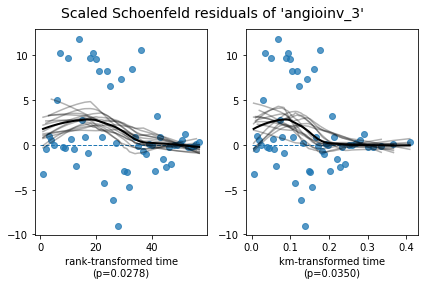

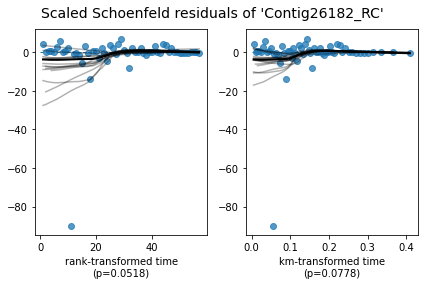

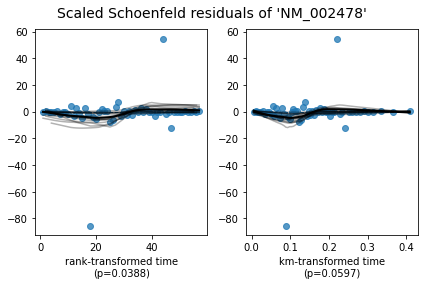

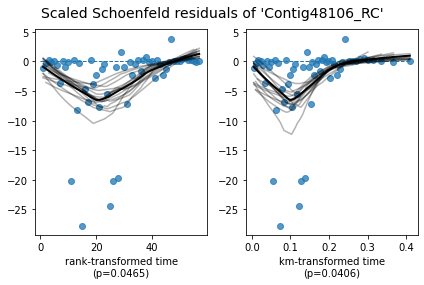

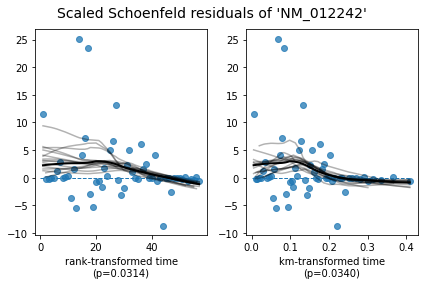

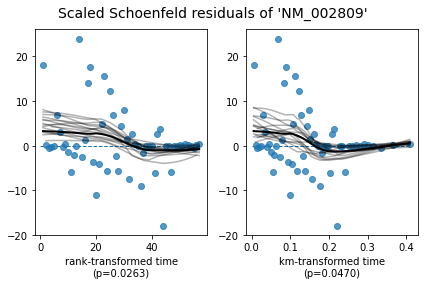

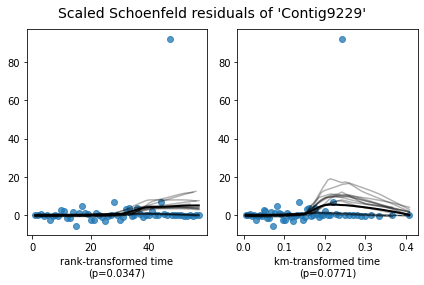

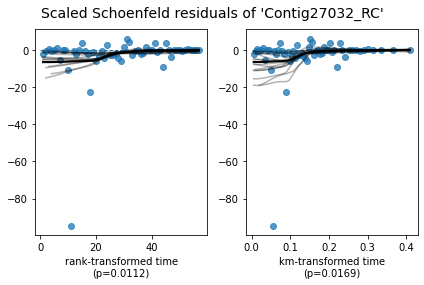

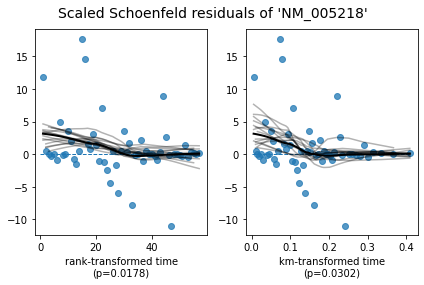

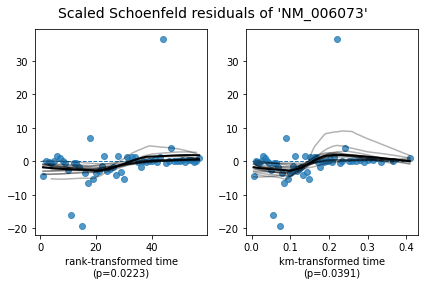

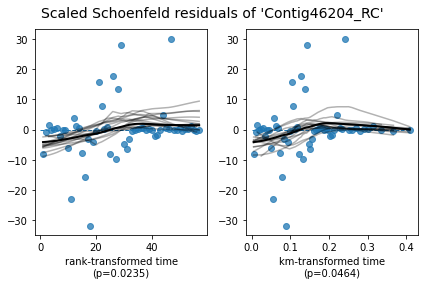

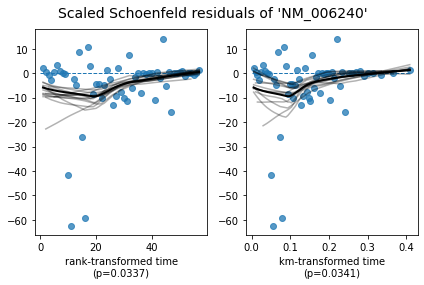

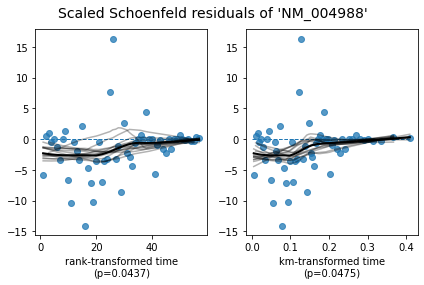

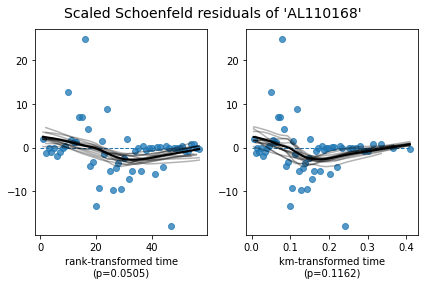

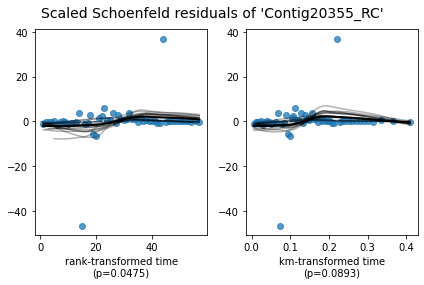

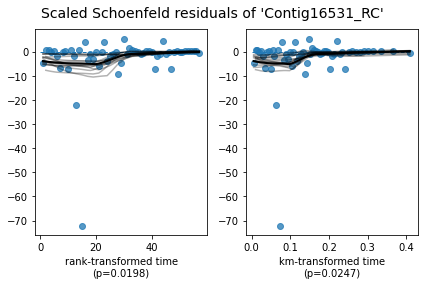

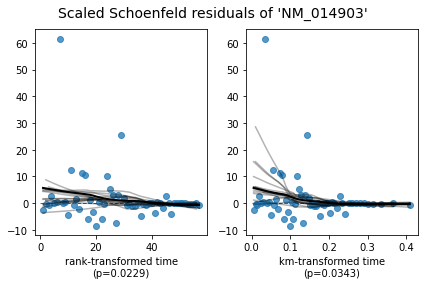

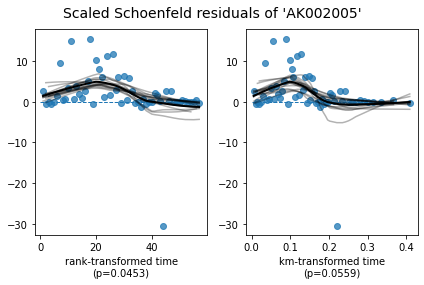

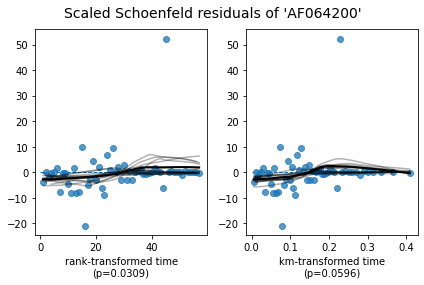

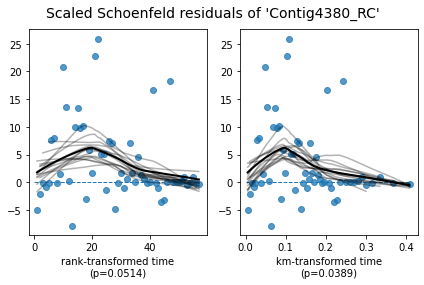

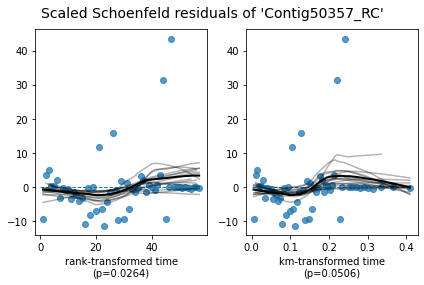

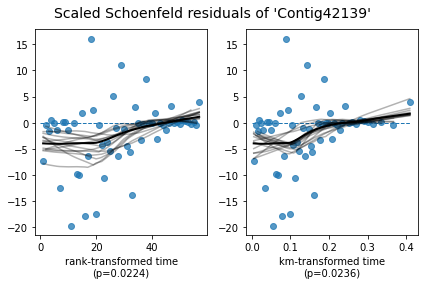

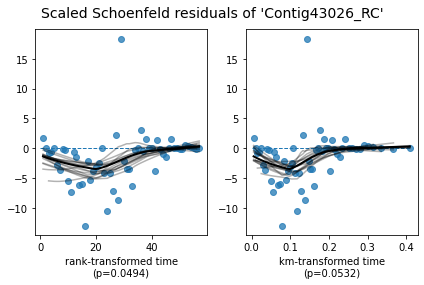

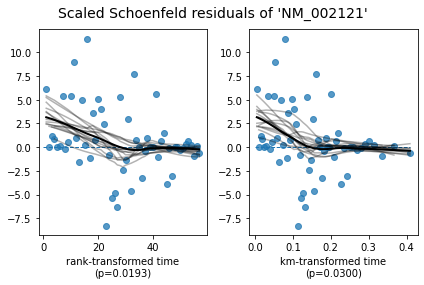

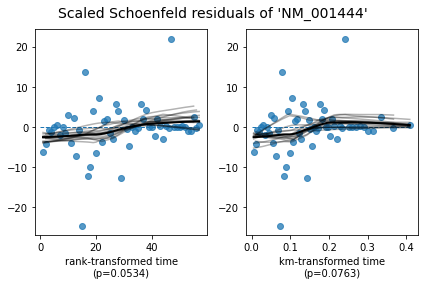

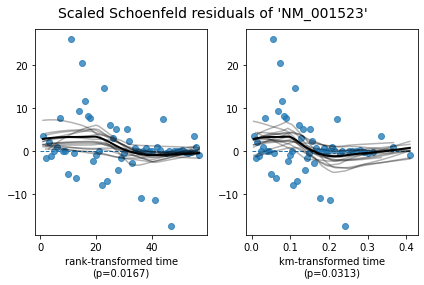

In [60]:
cph2.check_assumptions(cph2_train, p_value_threshold=0.05, show_plots=True)

## Comparing the 3 Models

### Want to choose the model based on the following criteria:
1. Higher Precision
2. Higher Recall
3. Higher F1 Score
4. Higher Accuracy
5. Higher Explained Variance value
5. Lowest Mean Absolute Error (MAE)


In [61]:
# Make a table of the above metrics
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'Precision', 'Recall', 'F1 score', 'Accuracy', 'Explained Variance', 'Mean Absolute Error']),
                 cells=dict(values=[['Logistic Regression (C:1000)', 'Random Forest (n_estimators = 67)'], [0.84, 0.82], [0.76, 0.67], [0.80, 0.74], [0.88, 0.85], [0.45, 0.33], [0.12, 0.15]]))
                     ])
fig.show()

#### Based on the metrics in the table above, the Logistic Regression Model (C:1000) seems to perform better than the Random Forest Model.

In [62]:
# Are there any overlaps in top features that may influence survival

df_piece = pd.concat([top_ten_positive_df, top_ten_negative_df, rf_top_ten, haz_ratio2_low_ten, haz_ratio2_high_ten], axis = 1)


df_piece = df_piece.rename(columns = {0 : 'Logistic Regression', 'importance': 'Random Forest', 'exp(coef)': 'Cox Proportional Hazard'}, inplace = False)
df_piece

Logistic Regression  Logistic Regression  Random Forest  \
Contig38654_RC             1.152736                  NaN            NaN   
Contig32594_RC             1.035528                  NaN            NaN   
NM_000853                  1.015765                  NaN            NaN   
NM_005130                  0.980268                  NaN            NaN   
diam                       0.805855                  NaN            NaN   
Contig29022_RC             0.759121                  NaN            NaN   
NM_001885                  0.749239                  NaN            NaN   
NM_003247                  0.665546                  NaN            NaN   
Contig14458_RC             0.663208                  NaN            NaN   
AL049279                   0.662963                  NaN            NaN   
timerecurrence                  NaN            -3.319254          0.041   
survival                        NaN            -1.640224          0.027   
NM_003311                       NaN            -0.997566            NaN   
U80736                          NaN            -0.972480            NaN   
Contig38918_RC                  NaN            -0.871696            NaN   
NM_004406                       NaN            -0.867507            NaN   
Contig45389_RC                  NaN            -0.847808            NaN   
Contig52994_RC                  NaN            -0.838095            NaN   
Contig38438_RC                  NaN            -0.809392            NaN   
NM_000096                       NaN            -0.787933            NaN   
Contig40552_RC                  NaN                  NaN          0.009   
NM_001809                       NaN                  NaN          0.007   
Contig23211_RC                  NaN                  NaN          0.007   
AL109706                        NaN                  NaN          0.007   
NM_018410                       NaN                  NaN          0.007   
NM_006096                       NaN                  NaN          0.007   
NM_019000                       NaN                  NaN          0.006   
Contig34989_RC                  NaN                  NaN          0.006   
AL049963                        NaN                  NaN            NaN   
Contig4380_RC                   NaN                  NaN            NaN   
D25217                          NaN                  NaN            NaN   
lymphinfil_3                    NaN                  NaN            NaN   
Contig31862_RC                  NaN                  NaN            NaN   
NM_006727                       NaN                  NaN            NaN   
NM_006338                       NaN                  NaN            NaN   
Contig23108_RC                  NaN                  NaN            NaN   
Contig3682_RC                   NaN                  NaN            NaN   
NM_006240                       NaN                  NaN            NaN   
NM_003234                       NaN                  NaN            NaN   
NM_004354                       NaN                  NaN            NaN   
NM_006206                       NaN                  NaN            NaN   
NM_014214                       NaN                  NaN            NaN   
Contig24682_RC                  NaN                  NaN            NaN   
X04706                          NaN                  NaN            NaN   
Contig10961_RC                  NaN                  NaN            NaN   
AF144054                        NaN                  NaN            NaN   
NM_003740                       NaN                  NaN            NaN   

                Cox Proportional Hazard  Cox Proportional Hazard  
Contig38654_RC                      NaN                      NaN  
Contig32594_RC                      NaN                      NaN  
NM_000853                           NaN                      NaN  
NM_005130                           NaN                      NaN  
diam                                NaN                      NaN  
Contig29022_R

In [63]:
# Using the features identified with Logistic Regression (best model), what are the feature definitions or function of the genes?
# Make Table to display this info
import plotly.graph_objects as go

fig2 = go.Figure(data=[go.Table(header=dict(values=['Feature', 'Function']),
                 cells=dict(values=[['Contig38654_RC', 'Contig32594_RC', 'NM_000853', 'NM_005130', 'diam',
'Contig29022_RC',
'NM_001885',
'NM_003247',
'Contig14458_RC',
'AL049279',
'timerecurrence',
'survival',
'NM_003311',
'U80736',
'Contig38918_RC',
'NM_004406',
'Contig45389_RC',
'Contig52994_RC',
'Contig38438_RC',
'NM_000096'], ['solute carrier family 28 (sodium-coupled nucleoside transporter)',
'Weakly similar to PIHUSD salivary proline-rich glycoprotein precursor PRB4',
'glutathione S-transferase theta 1',
'fibroblast growth factor binding protein 1 (FGFBP1)',
'Diameter of primary tumor',
'similar to zinc finger protein Sp5 (LOC375292)',
'crystallin alpha B (CRYAB)',
'thrombospondin 2 (THBS2)',
'uncharacterized',
'uncharacterized',
'Time (in years) until cancer recurrence or last follow-up',
'Time (in years) until death or last follow-up',
'pleckstrin homology like domain family A member 2 (PHLDA2)',
'TOX3 - associated with increased risk of breast cancer',
'LOC401021; uncharacterized',
'deleted in malignant brain tumors 1 (DMBT1)',
'uncharacterized',
'uncharacterized',
'uncharacterized',
'ceruloplasmin (CP)'], ])) ])

fig2.show()

## Finding genes that may exhibit differences in expression levels

Another goal of this study was to investigate whether there are differences in gene expression associated with survival. This will be examined below.

To examine whether particuar genes display a significant difference in expression levels between those individuals who survived ('eventdeath = 0') and those that did not ('eventdeath' = 1), dummy variables will be created for the 'eventdeath' column,

In [64]:
nki_bc_for_model2 = pd.get_dummies(nki_bc_for_model, prefix=['eventdeath'], columns=['eventdeath'])
nki_bc_for_model2.head()

age  survival  timerecurrence  histtype      diam  posnodes  chemo  \
0 -0.192098  1.728368        1.814682 -0.202499  0.284390 -0.637497      0   
1  0.724579  1.585775        1.681393 -0.202499 -0.291161 -0.637497      0   
2 -1.108775 -0.368384       -0.145252 -0.202499 -0.866712 -0.637497      0   
3  1.091250 -0.085305        0.119355 -0.202499 -0.866712 -0.162431      0   
4 -1.108775 -0.421768       -0.223387 -0.202499 -0.866712 -0.637497      0   

   hormonal  amputation  grade_1  ...  NM_000853  NM_000854  NM_000860  \
0         0           1        0  ...   0.373644  -0.760690  -0.164025   
1         0           0        0  ...  -0.062922  -0.682204  -0.220934   
2         0           0        0  ...   0.084228  -0.695950  -0.402840   
3         1           0        0  ...   0.182182  -0.524640   0.037320   
4         0           1        0  ...   0.057082  -0.565021  -0.105632   

   Contig29014_RC  Contig46616_RC  NM_000888  NM_000898  AF067420  \
0       -0.038726        0.237856  -0.087631  -0.369153  0.153795   
1       -0.100088       -0.466537  -0.231547  -0.643019 -0.014098   
2       -0.099965        0.110155  -0.114298   0.258495 -0.198911   
3       -0.167688       -0.016790  -0.285344  -0.251188  0.862710   
4       -0.108148       -0.405853  -0.053601  -0.677072  0.134160   

   eventdeath_0  eventdeath_1  
0             1             0  
1             1             0  
2             1             0  
3             1             0  
4             1             0  

[5 rows x 1574 columns]

In [65]:
# Create separate dfs for those who survived and those who did not
nki_bc_for_model_death = nki_bc_for_model[nki_bc_for_model['eventdeath'] == 1]
nki_bc_for_model_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 9 to 271
Columns: 1573 entries, age to AF067420
dtypes: float64(1560), int64(13)
memory usage: 946.9 KB


In [66]:
nki_bc_for_model_alive = nki_bc_for_model[nki_bc_for_model['eventdeath'] == 0]
nki_bc_for_model_alive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 260
Columns: 1573 entries, age to AF067420
dtypes: float64(1560), int64(13)
memory usage: 2.3 MB


In [67]:
# perform t-test for each variable between individuals who survived and individuals who did not
from scipy import stats
mylist=[]
for column_type1, column_type2 in zip(nki_bc_for_model_death, nki_bc_for_model_alive):
    ttest_values = (stats.ttest_ind(nki_bc_for_model_death[column_type1],nki_bc_for_model_alive[column_type2], equal_var=False, nan_policy='omit'))
    mylist.append(ttest_values)

ttest_df = pd.DataFrame(mylist, index = nki_bc_for_model.columns)
ttest_df.head()

statistic        pvalue
age             -2.251926  2.616959e-02
survival       -11.026015  3.553452e-21
timerecurrence -14.405009  2.906220e-32
histtype        -0.127469  8.987346e-01
diam             3.591811  4.568196e-04

In [68]:
# Identify and separate those variables that display a potentially significant difference (pvalue <= 0.05)
pvalue = ttest_df[ttest_df['pvalue'] <= 0.05]
pvalue

statistic        pvalue
age             -2.251926  2.616959e-02
survival       -11.026015  3.553452e-21
timerecurrence -14.405009  2.906220e-32
diam             3.591811  4.568196e-04
eventdeath            inf  0.000000e+00
...                   ...           ...
Contig55606_RC  -2.097631  3.783102e-02
NM_000849       -5.662648  6.051489e-08
Contig36312_RC  -1.984227  4.932619e-02
NM_000853       -2.529531  1.255364e-02
NM_000860       -2.372533  1.910971e-02

[619 rows x 2 columns]

#### Out of the 1,573 variables, 619 display a significant difference between individuals who survived and individuals who did not

Note: one of the 619 is 'eventdeath' as that was not removed from the data set

In [69]:
# Create a list of all variables with a pvalue <= 0.05
pvalue_trans = pvalue.T
column_names = pvalue_trans.columns.tolist()
column_names_length = len(column_names)
column_names_length

619

In [70]:
# Are the variables identified through the Logistic Regression model within the list generated above?

genes = (top_ten_positive_df.index.tolist() + top_ten_negative_df.index.tolist())
genes_list = []
for gene in genes: 
    if gene in column_names:
        genes_list.append(gene)
genes_list

['NM_000853',
 'diam',
 'timerecurrence',
 'survival',
 'NM_003311',
 'Contig38438_RC',
 'NM_000096']

In [71]:
# Are the variables identified through the Random Forest model within the list generated above?

genes2 = rf2_top_ten.index.tolist()
genes2_list = []
for gene in genes2: 
    if gene in column_names:
        genes2_list.append(gene)
genes2_list

['timerecurrence',
 'survival',
 'Contig40552_RC',
 'NM_018410',
 'Contig34989_RC',
 'Contig23211_RC',
 'NM_006096',
 'NM_001809']

In [72]:
# Are the variables identified through the Survival Analysis model within the list generated above?

genes3 = (haz_ratio_asc.index.tolist() + haz_ratio_desc.index.tolist())
genes3_list = []
for gene in genes2: 
    if gene in column_names:
        genes3_list.append(gene)
genes3_list

['timerecurrence',
 'survival',
 'Contig40552_RC',
 'NM_018410',
 'Contig34989_RC',
 'Contig23211_RC',
 'NM_006096',
 'NM_001809']

#### From the list of 619 features that have a pvalue <= 0.05, we now want to find the features that have a fold change in expression of >5 or <-5 for between those individuals that survived and those that did not. This will help narrow down the potential genes that could influence breast cancer survival.

In [73]:
# Find the mean values for the features based on 'eventdeath' column (either 0 = alive or 1 = death )
means = nki_bc_for_model.groupby('eventdeath').mean()
means.reset_index(drop=True, inplace=True)
means = means.T
means.columns = ['alive_mean', 'death_mean']
means

alive_mean  death_mean
age               0.092777   -0.234955
survival          0.339633   -0.860109
timerecurrence    0.382471   -0.968596
histtype          0.004638   -0.011747
diam             -0.135320    0.342692
...                    ...         ...
Contig29014_RC   -0.012376   -0.022143
Contig46616_RC   -0.038249   -0.105271
NM_000888        -0.047795   -0.014753
NM_000898        -0.218039   -0.297087
AF067420         -0.240386   -0.284536

[1572 rows x 2 columns]

In [74]:
# combine mean values with df with ttest results
df = pd.merge(nki_bc_for_model.T, ttest_df, left_index=True, right_index=True)

In [75]:
df.head()

0         1         2         3         4         5  \
age            -0.192098  0.724579 -1.108775  1.091250 -1.108775 -0.375433   
survival        1.728368  1.585775 -0.368384 -0.085305 -0.421768 -0.780710   
timerecurrence  1.814682  1.681393 -0.145252  0.119355 -0.223387 -1.080899   
histtype       -0.202499 -0.202499 -0.202499 -0.202499 -0.202499 -0.202499   
diam            0.284390 -0.291161 -0.866712 -0.866712 -0.866712 -1.442262   

                       6         7         8         9  ...       264  \
age             1.091250 -0.192098  0.541244 -0.925439  ... -1.108775   
survival        0.168975 -0.131665 -0.201206 -0.876942  ... -0.698981   
timerecurrence  0.357043  0.076020  0.011017 -1.471573  ... -1.469603   
histtype       -0.202499 -0.202499 -0.202499 -0.202499  ... -0.202499   
diam            0.284390 -0.866712 -0.521381 -0.636491  ...  0.859941   

                     265       266       267       268       269       270  \
age             0.174573 -1.475446  0.724579 -0.925439  1.091250  1.457921   
survival       -0.038948 -1.377998 -1.403988 -0.661035 -1.401192 -1.485524   
timerecurrence -0.565473 -1.545111 -1.263432 -1.012613 -1.223380 -1.208935   
histtype       -0.202499 -0.202499 -0.202499 -0.202499 -0.202499 -0.202499   
diam           -0.751602  0.284390  0.859941  0.859941  0.514610  0.629720   

                     271  statistic        pvalue  
age             1.457921  -2.251926  2.616959e-02  
survival       -1.114406 -11.026015  3.553452e-21  
timerecurrence -1.228633 -14.405009  2.906220e-32  
histtype       -0.202499  -0.127469  8.987346e-01  
diam            0.859941   3.591811  4.568196e-04  

[5 rows x 274 columns]

In [76]:
df2 = pd.merge(df, means, left_index=True, right_index=True)
df2.head()

0         1         2         3         4         5  \
age            -0.192098  0.724579 -1.108775  1.091250 -1.108775 -0.375433   
survival        1.728368  1.585775 -0.368384 -0.085305 -0.421768 -0.780710   
timerecurrence  1.814682  1.681393 -0.145252  0.119355 -0.223387 -1.080899   
histtype       -0.202499 -0.202499 -0.202499 -0.202499 -0.202499 -0.202499   
diam            0.284390 -0.291161 -0.866712 -0.866712 -0.866712 -1.442262   

                       6         7         8         9  ...       266  \
age             1.091250 -0.192098  0.541244 -0.925439  ... -1.475446   
survival        0.168975 -0.131665 -0.201206 -0.876942  ... -1.377998   
timerecurrence  0.357043  0.076020  0.011017 -1.471573  ... -1.545111   
histtype       -0.202499 -0.202499 -0.202499 -0.202499  ... -0.202499   
diam            0.284390 -0.866712 -0.521381 -0.636491  ...  0.284390   

                     267       268       269       270       271  statistic  \
age             0.724579 -0.925439  1.091250  1.457921  1.457921  -2.251926   
survival       -1.403988 -0.661035 -1.401192 -1.485524 -1.114406 -11.026015   
timerecurrence -1.263432 -1.012613 -1.223380 -1.208935 -1.228633 -14.405009   
histtype       -0.202499 -0.202499 -0.202499 -0.202499 -0.202499  -0.127469   
diam            0.859941  0.859941  0.514610  0.629720  0.859941   3.591811   

                      pvalue  alive_mean  death_mean  
age             2.616959e-02    0.092777   -0.234955  
survival        3.553452e-21    0.339633   -0.860109  
timerecurrence  2.906220e-32    0.382471   -0.968596  
histtype        8.987346e-01    0.004638   -0.011747  
diam            4.568196e-04   -0.135320    0.342692  

[5 rows x 276 columns]

In [77]:
# Find the fold change in means between the 'eventdeath groups' using (B-A)/A, where A = alive and B = death
df2['fold_change'] = (df2['death_mean'] - df2['alive_mean'])/df2['alive_mean']
df2.reset_index(level=0, inplace=True)
df2.rename(columns={'index':'feature'}, inplace=True)
df2.head()

feature         0         1         2         3         4         5  \
0             age -0.192098  0.724579 -1.108775  1.091250 -1.108775 -0.375433   
1        survival  1.728368  1.585775 -0.368384 -0.085305 -0.421768 -0.780710   
2  timerecurrence  1.814682  1.681393 -0.145252  0.119355 -0.223387 -1.080899   
3        histtype -0.202499 -0.202499 -0.202499 -0.202499 -0.202499 -0.202499   
4            diam  0.284390 -0.291161 -0.866712 -0.866712 -0.866712 -1.442262   

          6         7         8  ...       267       268       269       270  \
0  1.091250 -0.192098  0.541244  ...  0.724579 -0.925439  1.091250  1.457921   
1  0.168975 -0.131665 -0.201206  ... -1.403988 -0.661035 -1.401192 -1.485524   
2  0.357043  0.076020  0.011017  ... -1.263432 -1.012613 -1.223380 -1.208935   
3 -0.202499 -0.202499 -0.202499  ... -0.202499 -0.202499 -0.202499 -0.202499   
4  0.284390 -0.866712 -0.521381  ...  0.859941  0.859941  0.514610  0.629720   

        271  statistic        pvalue  alive_mean  death_mean  fold_change  
0  1.457921  -2.251926  2.616959e-02    0.092777   -0.234955    -3.532468  
1 -1.114406 -11.026015  3.553452e-21    0.339633   -0.860109    -3.532468  
2 -1.228633 -14.405009  2.906220e-32    0.382471   -0.968596    -3.532468  
3 -0.202499  -0.127469  8.987346e-01    0.004638   -0.011747    -3.532468  
4  0.859941   3.591811  4.568196e-04   -0.135320    0.342692    -3.532468  

[5 rows x 278 columns]

<AxesSubplot:xlabel='fold_change', ylabel='pvalue'>

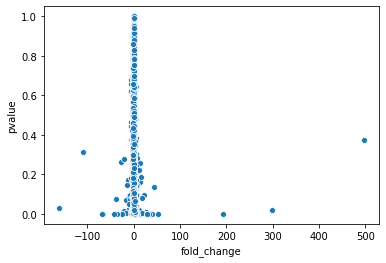

In [78]:
# Plot fold_change against pvalues
# Looking for "outliers" where the points are within desired criteria (pvalue <= 0.05 and fold_change <= -5 or >= 5)
sns.scatterplot(data=df2, x='fold_change', y='pvalue')

In [79]:
# Identify and separate those variables that display pvalue <= 0.05 and fold change |fold_change| >=5
pvalue_fold = df2.loc[(df2['pvalue'] <= 0.05) & ((df2['fold_change'] <= -5)|(df2['fold_change'] >= 5))]

pvalue_fold.head()

feature         0         1         2         3         4  \
42   Contig32037_RC  0.764825  0.046395 -0.030065 -0.074346 -0.028673   
59   Contig33260_RC  0.064086 -0.109258  0.038133  0.014587 -0.187535   
86        NM_000926 -0.206389  0.044582  0.293563  0.179245 -0.046541   
118          U46752 -0.190188 -0.040762 -0.118007 -0.135591 -0.041073   
121  Contig47045_RC -0.176333  0.156947  0.254080  0.278747  0.034033   

            5         6         7         8  ...       267       268  \
42  -0.063792  0.022667  0.046958  0.048812  ...  0.347400 -0.165327   
59   0.039344 -0.075857  0.581087 -0.466763  ... -0.409055 -0.268962   
86  -0.122379  0.068313 -0.027771 -0.363576  ... -0.509146 -0.068670   
118 -0.083105 -0.012415  0.031991  0.086854  ... -0.535218  0.131666   
121  0.124976  0.112083  0.436337  0.126243  ... -0.625487  0.095922   

          269       270       271  statistic        pvalue  alive_mean  \
42   0.077201  0.187994  0.859655   2.334679  2.035481e-02   -0.009960   
59  -0.465066 -0.520072  0.061320  -3.430634  7.806599e-04   -0.018079   
86  -0.390550 -0.282429 -0.371865  -5.670269  6.596984e-08   -0.034265   
118  0.064995 -0.027688  0.002795  -2.267927  2.431275e-02    0.006023   
121 -0.696225 -0.859736 -0.290438  -4.642288  9.127236e-06   -0.018647   

     death_mean  fold_change  
42     0.065986    -7.624954  
59    -0.157215     7.695772  
86    -0.268076     6.823710  
118   -0.047028    -8.808673  
121   -0.247483    12.272090  

[5 rows x 278 columns]

NameError: name 'x' is not defined

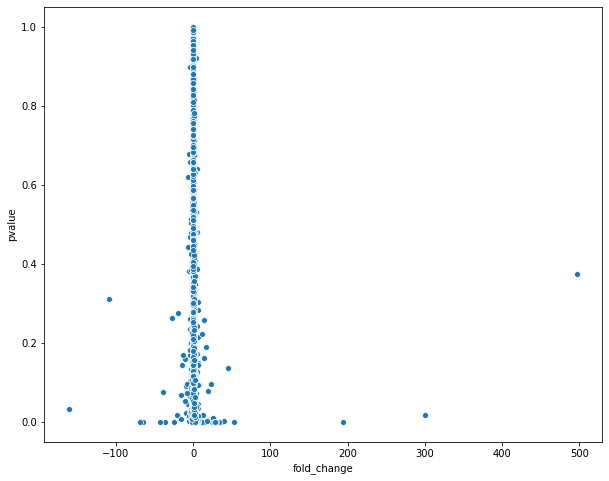

In [80]:
# label points in figure
names = df2.feature
plt.figure(figsize=(10,8))
sns.scatterplot(df2['fold_change'], df2['pvalue'])
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(x,y,names)]

In [ ]:
# create df with feature names of labeled points in above figure
features_pvalue_fold = pvalue_fold['feature']
features_pvalue_fold = pd.DataFrame(features_pvalue_fold)
features_pvalue_fold= features_pvalue_fold.reset_index(drop=True)
features_pvalue_fold.head()

#### There are 60 features that display a pvalue <=0.05 and fold change <=-5 or >=5. This will help narrow down on potential features that will help predict survival in breast cancer patients.

In [ ]:
lr_features = top_ten_positive_df.reset_index()
lr2_features = top_ten_negative_df.reset_index()

lr_features = lr_features.append(lr2_features)
lr_features.rename(columns={'index':'feature'}, inplace=True)

lr_features.head()

In [ ]:
result = pd.merge(features_pvalue_fold, lr_features, on="feature")
result

#### It seems as if there are no features that overlap between Logistic Regression and pvalue/fold change under these criteria. The fold change values will be lowered  to -2 or 2 to see if there are any overlap.

In [ ]:
# Identify and separate those variables that display pvalue <= 0.05 and fold change |fold_change| >=2
pvalue_fold2 = df2.loc[(df2['pvalue'] <= 0.05) & ((df2['fold_change'] <= -2)|(df2['fold_change'] >= 2))]

pvalue_fold2.head()

In [ ]:
result = pd.merge(pvalue_fold2, lr_features, on="feature")
result

#### There are 4 features that overlap: survival, timerecurrence, diam, and NM_000853.